# Clustering metrics - alternatives to the elbow method

Copy from https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb

Clustering is an important part of the machine learning pipeline for business or scientific enterprises utilizing data science. As the name suggests, it helps to identify congregations of closely related (by some measure of distance) data points in a blob of data, which, otherwise, would be difficult to make sense of.

A popular method like k-means clustering does not seem to provide a completely satisfactory answer when we ask the basic question:

    "How would we know the actual number of clusters, to begin with?"

This question is critically important because of the fact that the process of clustering is often a precursor to further processing of the individual cluster data and therefore, the amount of computational resource may depend on this measurement.

In the case of a business analytics problem, repercussion could be worse. Clustering is often done for such analytics with the goal of market segmentation. It is, therefore, easily conceivable that, depending on the number of clusters, appropriate marketing personnel will be allocated to the problem. Consequently, a wrong assessment of the number of clusters can lead to sub-optimum allocation of precious resources.

For the k-means clustering method, the most common approach for answering this question is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

In this notebook, we show what metric to use for visualizing and determining an optimal number of clusters much better than the usual practice-elbow method.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Create synthetic data using Scikit learn make_blob method
    - Number of features: 4
    - Number of clusters: 5
    - Number of samples: 200

In [14]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [15]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [16]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [17]:
d1 = data1[0]

In [18]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head(10)

,Feature_1,Feature_2,Feature_3,Feature_4
0,9.037665,1.992570,10.090339,-4.369381
1,5.681060,-8.445505,11.302097,5.129613
2,9.231644,2.149237,12.980812,-6.266576
3,11.033970,4.424406,10.846127,-8.579647
4,-7.272703,3.299426,9.969231,8.426359
5,10.464204,3.987651,8.877402,-8.305148
6,3.709956,-9.950179,8.753158,3.523595
7,-9.097806,3.931507,10.013402,6.758304
8,10.690482,4.881977,9.356959,-7.170045
9,10.958360,4.471100,11.253304,-7.272913


In [19]:
from itertools import combinations

In [20]:
lst_vars=list(combinations(df1.columns,2))

In [21]:
len(lst_vars)

6

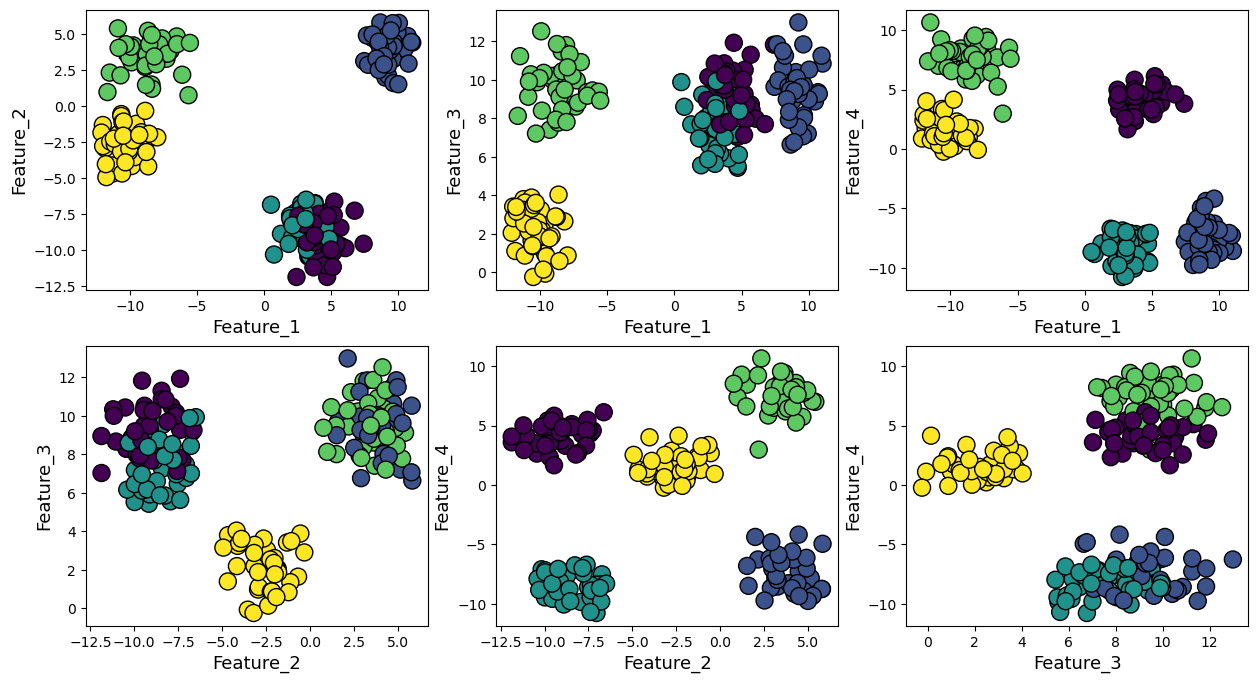

In [48]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)
plt.show()

# How are the classes separated (boxplots)

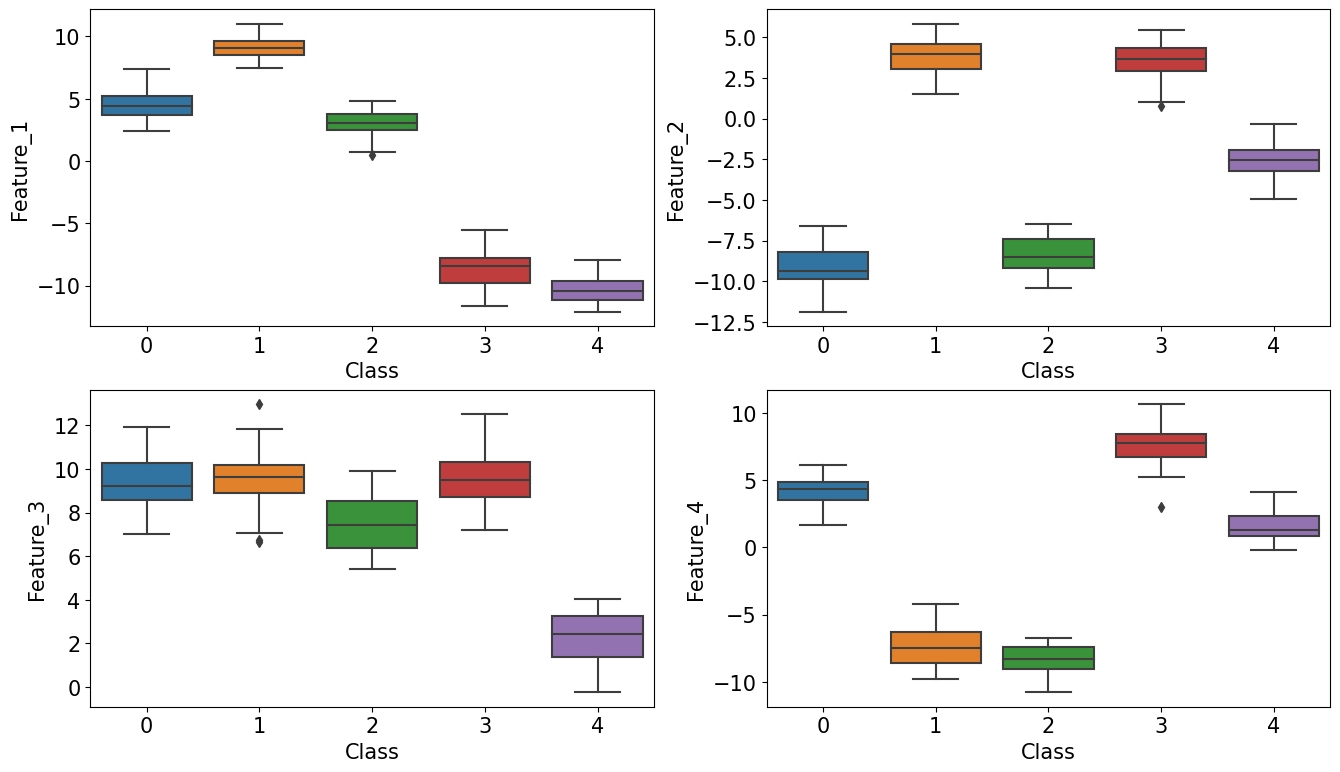

In [49]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
plt.show()

# k-means clustering

In [50]:
from sklearn.cluster import KMeans

## Unlabled data

In [51]:
X=df1

In [52]:
X.head(10)

,Feature_1,Feature_2,Feature_3,Feature_4
0,9.037665,1.992570,10.090339,-4.369381
1,5.681060,-8.445505,11.302097,5.129613
2,9.231644,2.149237,12.980812,-6.266576
3,11.033970,4.424406,10.846127,-8.579647
4,-7.272703,3.299426,9.969231,8.426359
5,10.464204,3.987651,8.877402,-8.305148
6,3.709956,-9.950179,8.753158,3.523595
7,-9.097806,3.931507,10.013402,6.758304
8,10.690482,4.881977,9.356959,-7.170045
9,10.958360,4.471100,11.253304,-7.272913


In [53]:
y=data1[1]

## Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
X_scaled=scaler.fit_transform(X)

## Metrics

In [57]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Running k-means and computing inter-cluster distance score for various k values

In [58]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)

    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))

    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -38.24922079640782
Silhouette score for number of cluster(s) 2: 0.4732188815863985
Davies Bouldin score for number of cluster(s) 2: 0.997480431661646
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -21.374013878747203
Silhouette score for number of cluster(s) 3: 0.5709578901989881
Davies Bouldin score for number of cluster(s) 3: 0.7408049276152971
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -11.140190737240413
Silhouette score for number of cluster(s) 4: 0.6574380161956043
Davies Bouldin score for number of cluster(s) 4: 0.5362487533761462
V-measure score for number of cluster(s) 4: 0.905746099275519
------------------------------------------------------

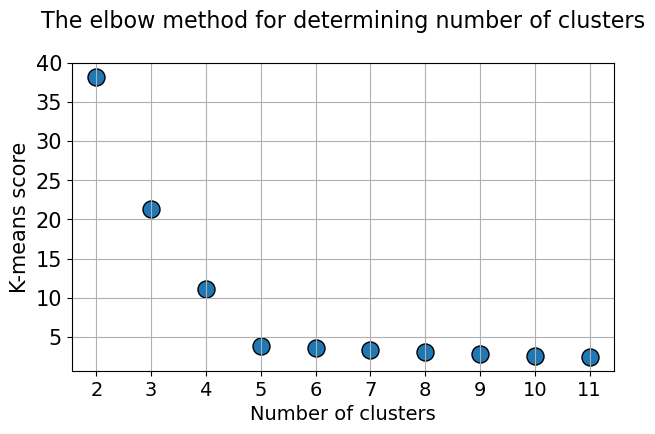

In [59]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

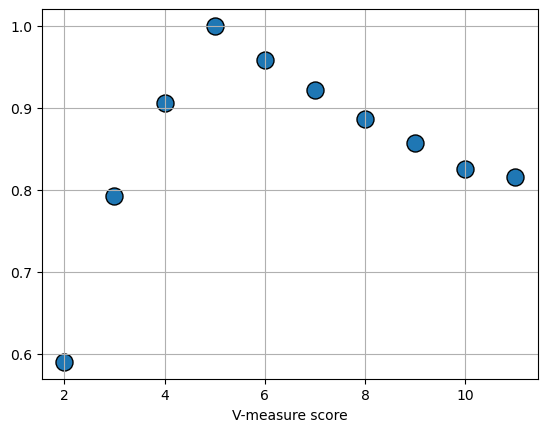

In [60]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

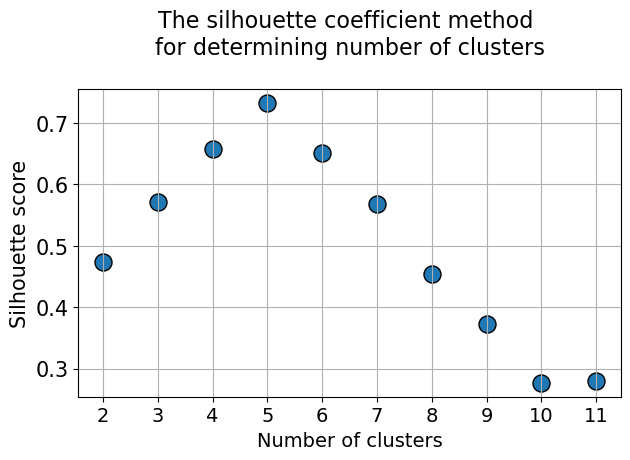

In [61]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

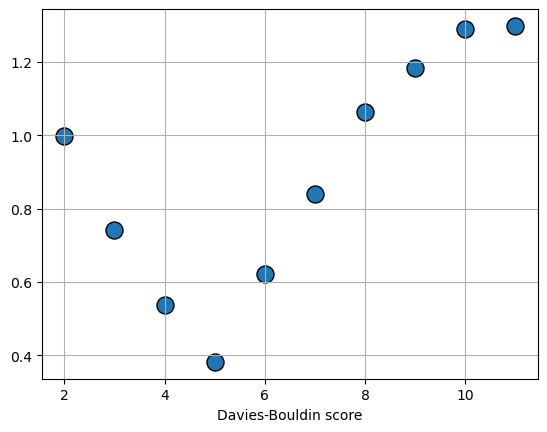

In [62]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

## Expectation-maximization (Gaussian Mixture Model)

In [63]:
from sklearn.mixture import GaussianMixture

In [64]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -661.85184726666
Log-likelihood score for number of cluster(s) 2: 2.0387576272413828
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -939.3843665234135
Log-likelihood score for number of cluster(s) 3: 2.9312758266288177
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -1050.6907950578839
Log-likelihood score for number of cluster(s) 4: 3.408228799210545
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -1134.5027427434047
Log-likelihood score for number of cluster(s) 5: 3.8164455696698987
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -1082.3262370040052
Log-likelihood score for number of cluster(s) 6: 3.884691206566951
--

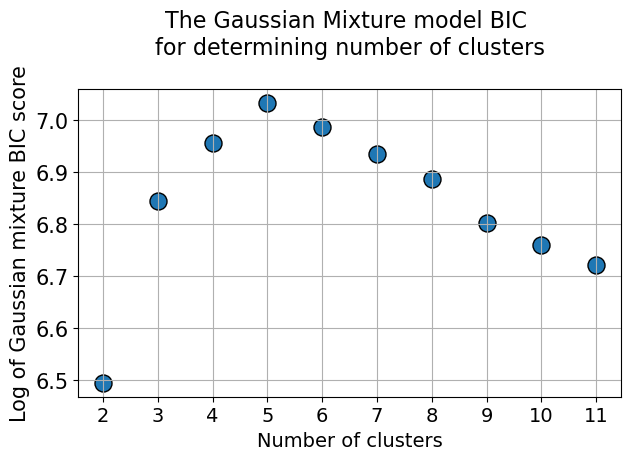

In [65]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

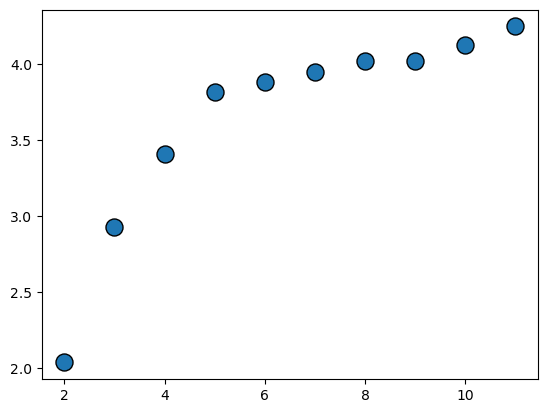

In [66]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()